<a href="https://colab.research.google.com/github/sarathkumar1304/computer-vision/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps involved in solving the objectives are as follow
### 1.import libraries
### 2.Defining Required Functions 
### 3.Image pre-processing


*  Grayscale conversion
*   Image Thresholding

*   Morphological Transformations(Noise removal)

###4.Counting rice grains using countours method
###5.Applying watershed Alogrithm
###6.Objective 1 : Count the Total No of Rice grains
### 7.Objective 2 : Count the Total no.of Broken rice in the image







# import required libraries

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters,feature,measure,color
from skimage.segmentation import watershed

### Defining a function for image visualization

In [ ]:
def show(image,x=30,y=7):
  img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

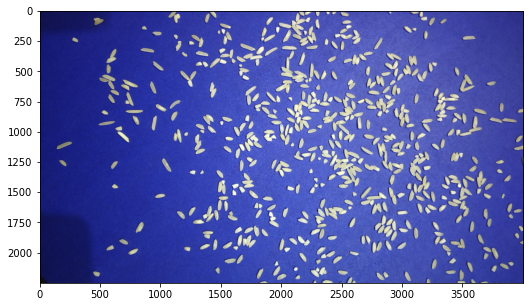

In [ ]:
img=cv2.imread("/content/image_1.jpg")
show(img,25,5)

## STEP 3 converting image into greysacle image and then image thershold

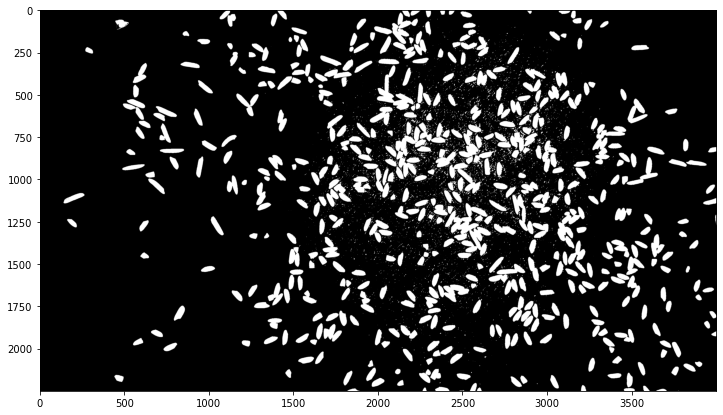

In [ ]:
greyscale_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh_img=cv2.threshold(greyscale_image,120,255,cv2.THRESH_BINARY)
show(thresh_img)

## Noise removal

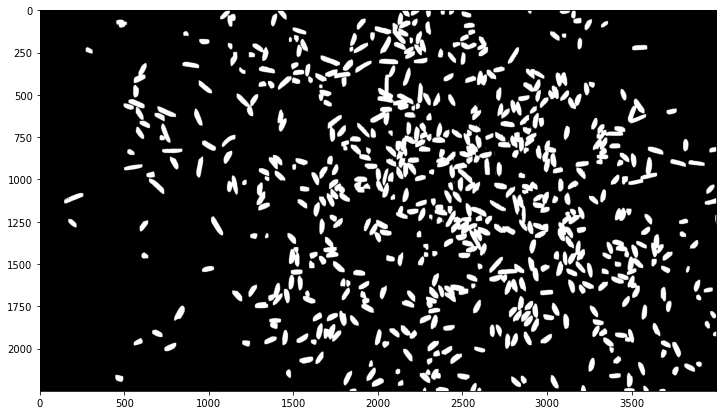

In [ ]:
#noise removal
kernal=np.ones((3),np.uint8)
clear_image=cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN,kernal,iterations=8)
show(clear_image)

# counting the labels

In [ ]:
label_image=clear_image.copy()

In [ ]:
#from skimage.morphology.convex_hull import label
label_count=0
rows,cols=label_image.shape

In [ ]:
for j in range(rows):
  for i in range(cols):
    pixel=label_image[j,i]
    if 255==pixel:
      label_count+=1
      cv.floodFill(label_image,None,(i,j),label_count)

No.of foreground objects : 516472


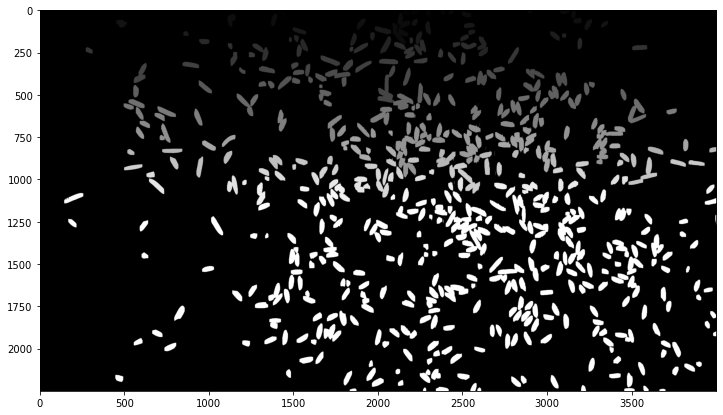

In [ ]:
print("No.of foreground objects :",label_count)
show(label_image)

# STEP 4 -Counting rice grains using countours method

In [ ]:
contours,hierarchy=cv.findContours(clear_image,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
output_contour=cv.cvtColor(clear_image,cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour,contours,-1,(0,0,255),2)
print("No.of detected contours :",len(contours))

No.of detected contours : 513


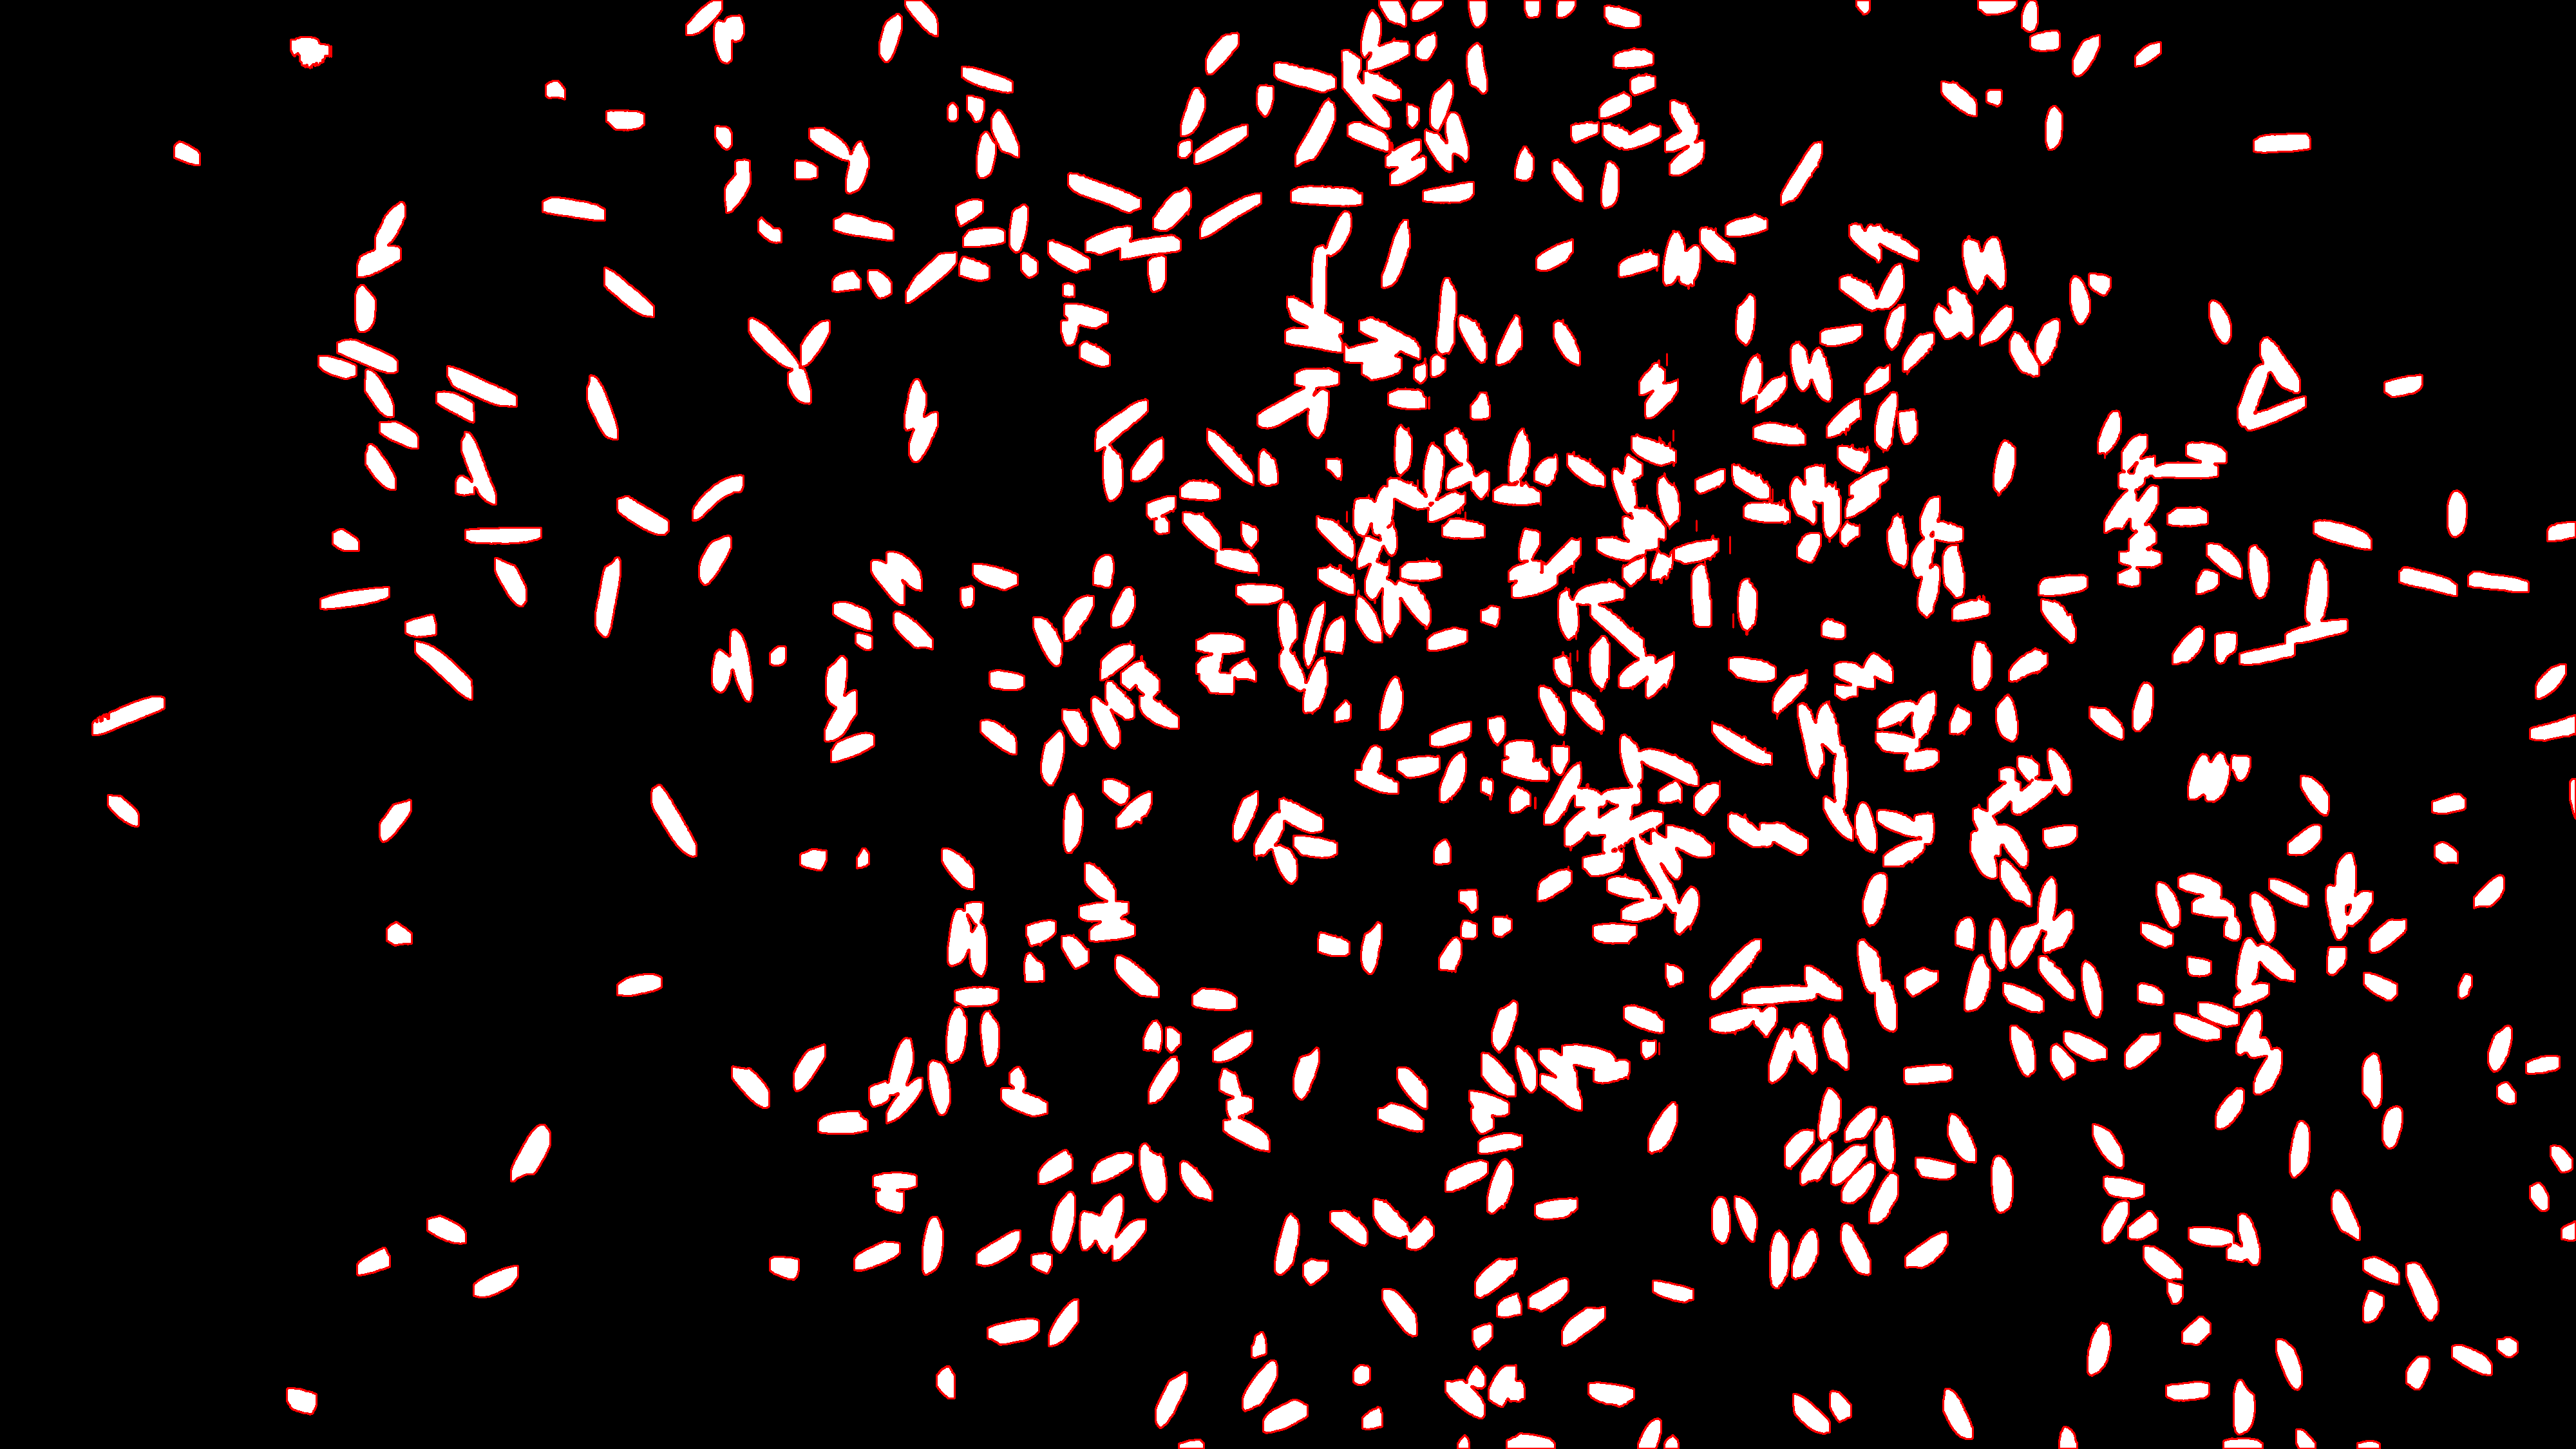

No.of detected contours : 513


In [ ]:
cv2_imshow(output_contour)
print("No.of detected contours :",len(contours))

No.of detected contours is 513 ,it denotes total no.of rice grains in the image

## output_contours image analysis
Looking at the output_image after applyong countours that there are some rice grains that are touching each other.
And this situation making opencv Countour method to treat those images as collection or as 1 rice grain.


# STEP 5 - Applying watershed Alogrithm

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
#There is aneed a colour code to visualize the segmenation conveniently

dist_trans=ndimage.distance_transform_edt(clear_image)

#Apllying peak_local_max to compute the distance from non-zero
local_max=feature.peak_local_max(dist_trans,min_distance=23)

local_max_mask=np.zeros(dist_trans.shape,dtype=bool)
local_max_mask[tuple(local_max.T)]=True

#Applying  watershed algorithm
labels=watershed(-dist_trans,measure.label(local_max_mask),mask=clear_image)
                                 

# Objective 1 : Count the Total No of Rice grains




No.of rice grain are : 586


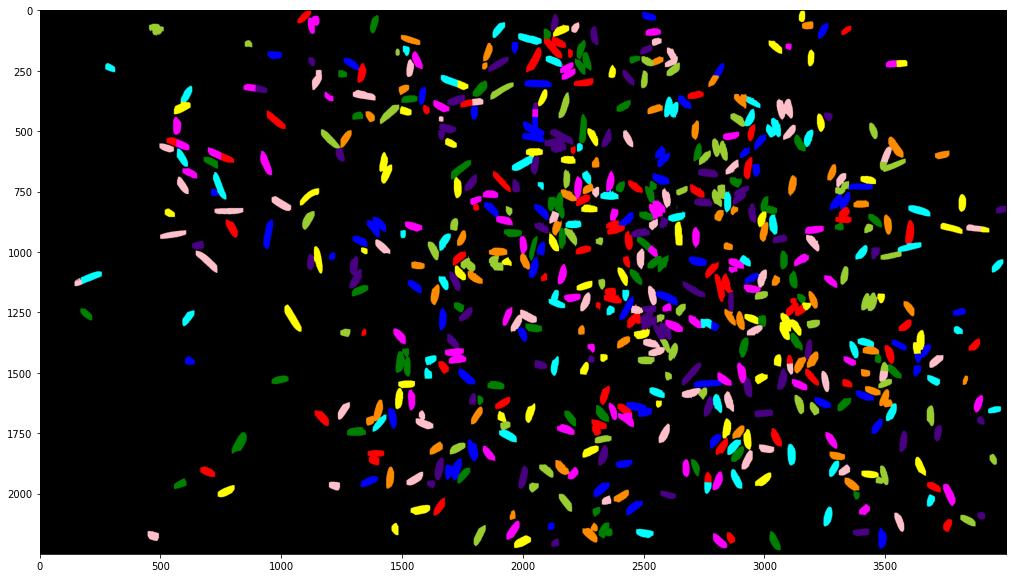

In [ ]:
#label2rgb function,specifying the background label with argument bg_label=0
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels,bg_label=0))
print("No.of rice grain are : %d" %labels.max())

# Result of WaterShed Algorithm
The results are quite better after applying the **WaterShed Algorithm**.Most of the touching rice grains are well seperated now and countig is more accuarate .

In the above results,there is total counting is **513** and here the count is **586** and it means ,there is total gap of 73 grains

After carefull analysis I found that 800 is the threshold limit for classifing the broken rice grains from the full rice grains

Thus applying thw limiton on the contour to get the results

Well the results are not 100% accurate but it is feasible in respect of simple countous counting

# Objective 2 : Count the Total no.of Broken rice in the image


In [ ]:
count=[]
for x in contours:
  area=cv.contourArea(x)
  if area<800:
    count.append(x)
print("Total No.of broken rice in the image :",len(count))

Total No.of broken rice in the image : 87
